<a href="https://colab.research.google.com/github/Sumit120597/Sumit120597/blob/main/horse_or_human_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2022-05-08 03:23:06--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.5.128, 64.233.184.128, 64.233.166.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.5.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.1’

horse-or-human.zip. 100%[===================>] 142.65M  59.8MB/s    in 2.4s    

2022-05-08 03:23:10 (59.8 MB/s) - ‘horse-or-human.zip.1’ saved [149574867/149574867]



In [6]:
import zipfile
local_zip='./horse-or-human.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [7]:
import os
train_horse_dir=os.path.join('./horse-or-human/horses')
train_human_dir=os.path.join('./horse-or-human/humans')

In [8]:
print('total number of images in horse file:',len(os.listdir(train_horse_dir)))
print('total number of images in human file:',len(os.listdir(train_human_dir)))

total number of images in horse file: 500
total number of images in human file: 527


In [9]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse30-7.png', 'horse25-1.png', 'horse45-9.png', 'horse26-9.png', 'horse12-0.png', 'horse23-1.png', 'horse32-0.png', 'horse39-4.png', 'horse46-2.png', 'horse32-6.png']
['human06-14.png', 'human16-09.png', 'human17-10.png', 'human05-28.png', 'human11-14.png', 'human03-28.png', 'human12-03.png', 'human07-25.png', 'human02-05.png', 'human02-22.png']


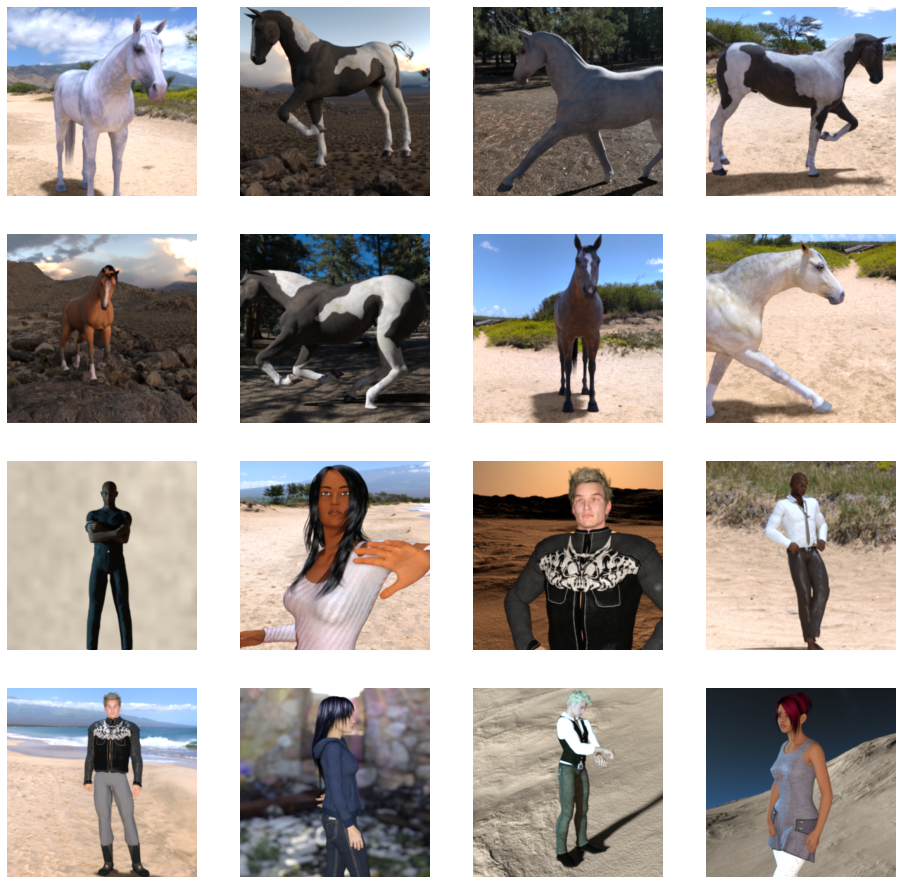

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig =plt.gcf()
fig.set_size_inches(4*4,4*4)
pic_index=8
next_horse_pix=[os.path.join(train_horse_dir,fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix=[os.path.join(train_human_dir,fname)
                for fname in train_human_names[pic_index-8:pic_index]]    
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp=plt.subplot(4,4,i+1)
  sp.axis('off')
  img=mpimg.imread(img_path)
  plt.imshow(img)
plt.show()  
                  
                                                  
                             

In [29]:
import tensorflow as tf
from tensorflow import keras

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [32]:
model=tf.keras.Sequential([
                           tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(512,activation='relu'),
                           tf.keras.layers.Dense(1,activation='sigmoid')

])

In [33]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 35, 35, 64)      

In [34]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 23s 780ms/step - loss: 1.3586 - accuracy: 0.5006
Epoch 2/15
8/8 [==============================] - 8s 946ms/step - loss: 0.6514 - accuracy: 0.6982
Epoch 3/15
8/8 [==============================] - 7s 849ms/step - loss: 0.4703 - accuracy: 0.7987
Epoch 4/15
8/8 [==============================] - 8s 920ms/step - loss: 0.3079 - accuracy: 0.8584
Epoch 5/15
8/8 [==============================] - 7s 989ms/step - loss: 0.2196 - accuracy: 0.9088
Epoch 6/15
8/8 [==============================] - 7s 865ms/step - loss: 0.1884 - accuracy: 0.9221
Epoch 7/15
8/8 [==============================] - 7s 858ms/step - loss: 0.1308 - accuracy: 0.9511
Epoch 8/15
8/8 [==============================] - 8s 961ms/step - loss: 0.1464 - accuracy: 0.9434
Epoch 9/15
8/8 [==============================] - 7s 862ms/step - loss: 0.1223 - accuracy: 0.9577
Epoch 10/15
8/8 [==============================] - 7s 860ms/step - loss: 0.1839 - accuracy: 0.9410
Epoch 11/15
8/8 [=

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


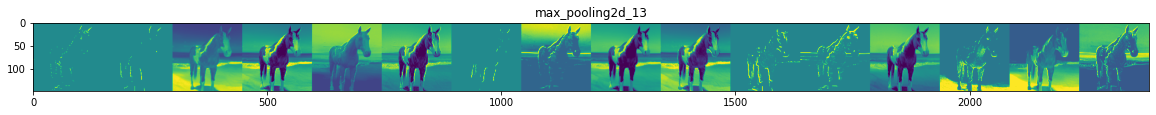

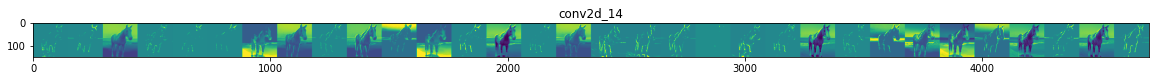

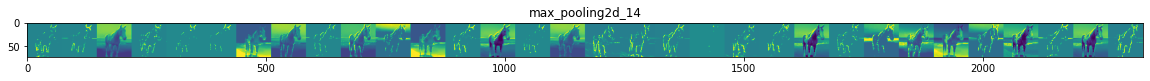

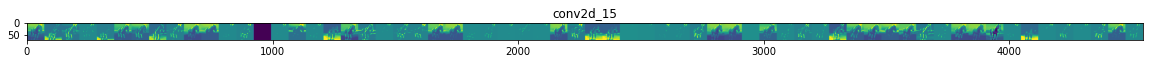

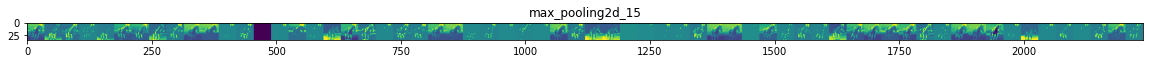

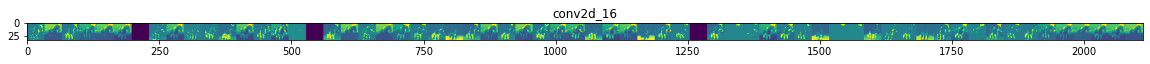

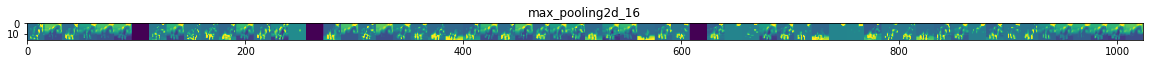

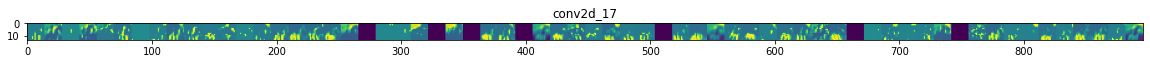

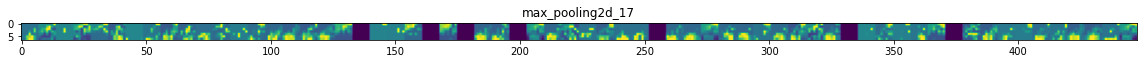

In [36]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [39]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
    
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving download.jpg to download.jpg
[6.047893e-10]
download.jpg is a horse
